### exe-1) 학생 키에 대한 두 집단 비교

In [1]:
import numpy as np
from scipy import stats

In [2]:
### 데이터 생성하기
# 최소값 157~최대값 178까지의 범위 중에 size 20개 생성
group1Heights = np.random.randint(low=157, high=178, size=20)
print("group1Heights = ", group1Heights)

group2Heights = np.random.randint(low=162, high=182, size=20)
print("group2Heights = ", group2Heights)

group1Heights =  [158 167 162 171 174 168 174 158 171 174 168 163 176 160 163 161 177 170
 173 177]
group2Heights =  [172 176 162 177 171 162 170 164 166 172 177 174 170 166 169 178 173 180
 181 170]


In [3]:
# 검증하기 (Independent Samples t-test)
# 첫번째 : 기준집단, 
# 두번째 : 관측집단
tResult = stats.ttest_ind(group1Heights, group2Heights)

print("한 집단 평균 검정 (단일 표본검정) = ", tResult)
print("t-검정 통계량 = %.3f,   p-value = %.3f" %(tResult))

# (해석)
#  1. p-value=0.097 > 0.05 이므로, 귀무가설 체택
#  2. 귀무가설 체택 : 두 집단간 평균의 차이는 없다.

한 집단 평균 검정 (단일 표본검정) =  Ttest_indResult(statistic=-1.7025092194093039, pvalue=0.09682811591605456)
t-검정 통계량 = -1.703,   p-value = 0.097


### exe-2) 남녀 두 집단 간 파이썬 시험의 평균차이 검정
##### - 귀무가설 : 남녀 두 집단 간 파이썬 시험의 평균에 차이가 없다.
##### - 대립가설 : 남녀 두 집단 간 파이썬 시험의 평균에 차이가 있다.

In [4]:
import numpy as np
import scipy.stats as stats

In [5]:
### 데이터 생성
male = [75, 85, 100, 72.5, 86.5]
female = [63.2, 76, 52, 100, 70]

In [6]:
# 검증하기 (Independent Samples t-test)
# 첫번째 : 기준집단, 
# 두번째 : 관측집단
result1 = stats.ttest_ind(male, female)

print("한 집단 평균 검정 (단일 표본검정) = ", result1)
print("t-검정 통계량 = %.3f,   p-value = %.3f" %(result1))

# (해석)
#  1. p-value=0.253 > 0.05 이므로, 귀무가설 체택
#  2. 귀무가설 체택 : 두 집단간 평균의 차이는 없다.

한 집단 평균 검정 (단일 표본검정) =  Ttest_indResult(statistic=1.233193127514512, pvalue=0.2525076844853278)
t-검정 통계량 = 1.233,   p-value = 0.253


### exe3) 두가지 교육방법에 따른 평균학점에 대한 차이 검정수행
##### - 귀무가설 : 두 교육방법에 따른 평균학점에는 차이가 없다
##### - 대립가설 : 두 교육방법에 따른 평균학점에는 차이가 있다

In [18]:
# 데이터 가지고 오기 : two_sample.csv 사용
import pandas as pd

data = pd.read_csv("./data/two_sample.csv")
data
# 교육방법 1과 2를 추출해 주세요.
# 교육방법1에 대한 데이터 변수 : m1 변수에 저장
m1 = data[data["교육방법"] == 1]
m1
# 교육방법2에 대한 데이터 변수 : m2 변수에 저장
m2 = data[data["교육방법"] == 2].reset_index(drop=True)
m2
# 교육방법1에 대한 학점만 추출한 데이터 변수 : scor1 변수에 저장
scor1 = m1["학점"]
scor1
# 교육방법2에 대한 학점만 추출한 데이터 변수 : scor2 변수에 저장
scor2 = m2["학점"]
scor2
# 결측치 처리까지 : 결측치는 평균으로 처리
# 결측치 처리 후 -> 자기 변수에 저장(scor1, scor2)
scor1 = scor1.fillna(scor1.mean())
scor1

scor2 = scor2.fillna(scor2.mean())
scor2

0    4.200000
1    4.100000
2    4.077778
3    3.900000
4    4.200000
5    4.100000
6    4.300000
7    3.800000
8    4.200000
9    3.900000
Name: 학점, dtype: float64

In [21]:
# 정규성 검정 (stats.shapiro())
# 검증 시 대부분의 집단은 정규분포를 따른다는 가정하에 진행하는 것이 일반적..
# p-value의 값이 커질 수록, 평균의 분포는 정규분포를 띈다..

resultSh = stats.shapiro(scor1)
print("정규성 검정 결과 = ", resultSh)
print("검정 통계량 = %.3f,   p-value = %.3f" %(resultSh))

# (해석)
# - p-value = 0.803 > 0.05 이므로, 정규성을 만족

resultSh = stats.shapiro(scor2)
print("정규성 검정 결과 = ", resultSh)
print("검정 통계량 = %.3f,   p-value = %.3f" %(resultSh))

# (해석)
# - p-value = 0.336 > 0.05 이므로, 정규성을 만족

정규성 검정 결과 =  ShapiroResult(statistic=0.9615016579627991, pvalue=0.8028513789176941)
검정 통계량 = 0.962,   p-value = 0.803
정규성 검정 결과 =  ShapiroResult(statistic=0.9173869490623474, pvalue=0.3356756865978241)
검정 통계량 = 0.917,   p-value = 0.336


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


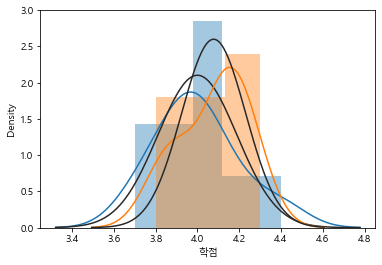

In [26]:
# 정규분포 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 처리
plt.rc("font", family = "Malgun Gothic")
# x : 데이터 집합
# stats.norm : 정규 분포 표시
sns.distplot(scor1, fit=stats.norm)
sns.distplot(scor2, fit=stats.norm)
plt.show()

In [31]:
### 등분산성 검증
# - 귀무가설 : 두 집단간 분산이 동일하다. (p-value > 0.05)
# - 대립가설 : 두 집단간 분산이 동일하지 않다

# 등분산성 검증은 3가지 방법으로 진행됩니다.
# 1. levene(레빈) 방법
# 2. fligner(플리그너) 방법
# 3. bartlett(바틀렛) 방법

sLevene = stats.levene(scor1, scor2)
print("등분산성 levene 검증결과 = ", sLevene)
print("t-검정 통계량 = %.3f,   p-value = %.3f" %(sLevene))
# (해석)
#  1. p-value=0.742 > 0.05 이므로, 귀무가설 체택
#  2. 귀무가설 체택 : 두 집단간 등분산성 만족
print()

sFligner = stats.fligner(scor1, scor2)
print("등분산성 fligner 검증결과 = ", sFligner)
print("t-검정 통계량 = %.3f,   p-value = %.3f" %(sFligner))
# (해석)
#  1. p-value=0.923 > 0.05 이므로, 귀무가설 체택
#  2. 귀무가설 체택 : 두 집단간 등분산성 만족
print()

sBartlett = stats.bartlett(scor1, scor2)
print("등분산성 bartlett 검증결과 = ", sBartlett)
print("t-검정 통계량 = %.3f,   p-value = %.3f" %(sBartlett))
# (해석)
#  1. p-value=0.537 > 0.05 이므로, 귀무가설 체택
#  2. 귀무가설 체택 : 두 집단간 등분산성 만족

등분산성 levene 검증결과 =  LeveneResult(statistic=0.11149825783972156, pvalue=0.7423035272233627)
t-검정 통계량 = 0.111,   p-value = 0.742

등분산성 fligner 검증결과 =  FlignerResult(statistic=0.009351524793910174, pvalue=0.9229620332079382)
t-검정 통계량 = 0.009,   p-value = 0.923

등분산성 bartlett 검증결과 =  BartlettResult(statistic=0.38065029633127184, pvalue=0.5372554141124455)
t-검정 통계량 = 0.381,   p-value = 0.537


In [32]:
# 검증하기 (Independent Samples t-test)
# 첫번째 : 기준집단, 
# 두번째 : 관측집단
result = stats.ttest_ind(scor1, scor2)

print("한 집단 평균 검정 (단일 표본검정) = ", result)
print("t-검정 통계량 = %.3f,   p-value = %.3f" %(result))

# (해석)
#  1. p-value=0.352 > 0.05 이므로, 귀무가설 체택
#  2. 귀무가설 체택 : 두 집단간 평균의 차이는 없다.

한 집단 평균 검정 (단일 표본검정) =  Ttest_indResult(statistic=-0.9561271382392642, pvalue=0.3516741458629946)
t-검정 통계량 = -0.956,   p-value = 0.352


In [33]:
# 검증하기 (Independent Samples t-test)
# 첫번째 : 기준집단, 
# 두번째 : 관측집단

# equal_var : 정규성과 등분산성 모두를 만족하는 경우 작성
result = stats.ttest_ind(scor1, scor2, equal_var=True)

print("한 집단 평균 검정 (단일 표본검정) = ", result)
print("t-검정 통계량 = %.3f,   p-value = %.3f" %(result))

# (해석 - 검증결과)
#  1. p-value=0.352 > 0.05 이므로, 귀무가설 채택
#  2. 귀무가설 채택 : 두 집단간 평균의 차이는 없다.

한 집단 평균 검정 (단일 표본검정) =  Ttest_indResult(statistic=-0.9561271382392642, pvalue=0.3516741458629946)
t-검정 통계량 = -0.956,   p-value = 0.352


### exe-4) 어느 음식점의 매출자료와 날씨자료를 이용하여
### ......... 강수 여부에 따른 매출의 차이에 대하여 분석..
##### 집단 1 : 비가 올때의 매출
##### 집단 2 : 비가 안올때의 매출
##### - 귀무가설 : 강수여부에 따른 매출액 평균에 차이가 없다
##### - 대립가설 : 강수여부에 따른 매출액 평균에 차이가 있다

In [34]:
# 사용 라이브러리
import numpy as np
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
# 매출 데이터 : tsales.csv
#  - YMD : 날짜,  AMT : 매출

# 날씨 데이터 : tweather.csv
#  - tm : 날짜,  sumRn : 강수량

In [42]:
# 매출 데이터 : tsales.csv
sales_data = pd.read_csv("./data/tsales.csv", dtype={"YMD" : "object"})
sales_data.info()

# 날짜, 매출액 추출
sales_temp = sales_data[["YMD", "AMT"]]
sales_temp

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328 entries, 0 to 327
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   YMD     328 non-null    object
 1   AMT     328 non-null    int64 
 2   CNT     328 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.8+ KB


,YMD,AMT
0,20190514,0
1,20190519,18000
2,20190521,50000
3,20190522,125000
4,20190523,222500
...,...,...
323,20200424,1092500
324,20200425,672500
325,20200426,1123500
326,20200427,819500


In [43]:
# 날씨 데이터 : tweather.csv
wt_data = pd.read_csv("./data/tweather.csv")
wt_data.info()
wt_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   stnId   702 non-null    int64  
 1   tm      702 non-null    object 
 2   avgTa   702 non-null    float64
 3   minTa   702 non-null    float64
 4   maxTa   702 non-null    float64
 5   sumRn   702 non-null    float64
 6   maxWs   702 non-null    float64
 7   avgWs   702 non-null    float64
 8   ddMes   702 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 49.5+ KB


,stnId,tm,avgTa,minTa,maxTa,sumRn,maxWs,avgWs,ddMes
0,108,2018-06-01,23.8,17.5,30.2,0.0,4.3,1.9,0.0
1,108,2018-06-02,23.4,17.6,30.1,0.0,4.5,2.0,0.0
2,108,2018-06-03,24.0,16.9,30.8,0.0,4.2,1.6,0.0
3,108,2018-06-04,22.6,18.9,27.5,0.0,4.4,1.9,0.0
4,108,2018-06-05,23.7,17.7,29.2,0.0,4.0,1.7,0.0
...,...,...,...,...,...,...,...,...,...
697,108,2020-04-28,13.9,7.8,19.9,0.0,5.5,3.0,0.0
698,108,2020-04-29,14.9,9.3,21.0,0.0,5.2,2.6,0.0
699,108,2020-04-30,17.1,9.3,23.4,0.0,5.9,2.7,0.0
700,108,2020-05-01,20.2,16.4,26.2,0.0,5.5,2.7,0.0


In [46]:
wt_data["tm"] = wt_data["tm"].str.replace("-", "")
wt_data

wt_temp = wt_data[["tm", "sumRn"]]
wt_temp

,tm,sumRn
0,20180601,0.0
1,20180602,0.0
2,20180603,0.0
3,20180604,0.0
4,20180605,0.0
...,...,...
697,20200428,0.0
698,20200429,0.0
699,20200430,0.0
700,20200501,0.0


In [48]:
# 매출데이터와 날씨데이터 합치기
data = sales_temp.merge(wt_temp, how="left", left_on="YMD", right_on="tm")
data

,YMD,AMT,tm,sumRn
0,20190514,0,20190514,0.0
1,20190519,18000,20190519,22.0
2,20190521,50000,20190521,0.0
3,20190522,125000,20190522,0.0
4,20190523,222500,20190523,0.0
...,...,...,...,...
323,20200424,1092500,20200424,0.0
324,20200425,672500,20200425,0.0
325,20200426,1123500,20200426,0.0
326,20200427,819500,20200427,0.0


In [51]:
data["rain_yn"] = (data["sumRn"] > 0).astype(int)
data

,YMD,AMT,tm,sumRn,rain_yn
0,20190514,0,20190514,0.0,0
1,20190519,18000,20190519,22.0,1
2,20190521,50000,20190521,0.0,0
3,20190522,125000,20190522,0.0,0
4,20190523,222500,20190523,0.0,0
...,...,...,...,...,...
323,20200424,1092500,20200424,0.0,0
324,20200425,672500,20200425,0.0,0
325,20200426,1123500,20200426,0.0,0
326,20200427,819500,20200427,0.0,0


In [56]:
# 비가 안올때 매출값 추출하기
rainNamt = data[(data["rain_yn"] == 0)]["AMT"]
rainNamt = rainNamt.reset_index(drop=True)
rainNamt

# 비가 올때 매출값 추출하기
rainYamt = data[(data["rain_yn"] == 1)]["AMT"]
rainYamt = rainYamt.reset_index(drop=True)
rainYamt

0      18000
1     274000
2     318000
3     139500
4     482500
       ...  
87    933000
88    700000
89    760500
90    908000
91    741000
Name: AMT, Length: 92, dtype: int64

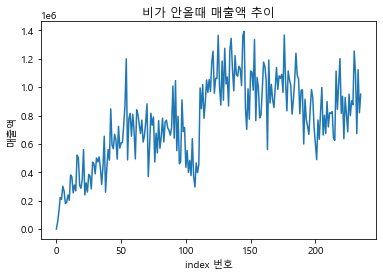

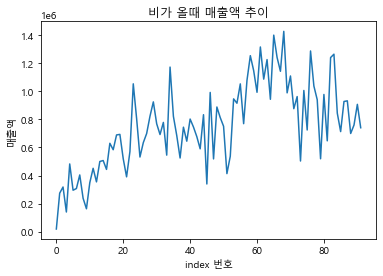

In [59]:
# 비가 안올때 매출액 추이 시각화
plt.plot(rainNamt)
plt.title("비가 안올때 매출액 추이")
plt.xlabel("index 번호")
plt.ylabel("매출액")
plt.show()

# 비가 올때 매출액 추이 시각화
plt.plot(rainYamt)
plt.title("비가 올때 매출액 추이")
plt.xlabel("index 번호")
plt.ylabel("매출액")
plt.show()

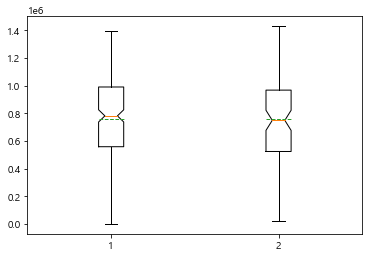

In [60]:
# 평균(중앙점) 추이 분석 - 박스플롯 이용
plt.boxplot([rainNamt, rainYamt],
            meanline = True,
            showmeans= True,
            notch = True)
plt.show()

In [62]:
# 정규성 검정 (stats.shapiro())
# 검증 시 대부분의 집단은 정규분포를 따른다는 가정하에 진행하는 것이 일반적..
# p-value의 값이 커질 수록, 평균의 분포는 정규분포를 띈다..

resultSh = stats.shapiro(rainNamt)
print("정규성 검정 결과 = ", resultSh)
print("검정 통계량 = %.3f,   p-value = %.3f" %(resultSh))

# (해석)
# - p-value = 0.056 > 0.05 이므로, 정규성을 만족

print()

resultSh = stats.shapiro(rainYamt)
print("정규성 검정 결과 = ", resultSh)
print("검정 통계량 = %.3f,   p-value = %.3f" %(resultSh))

# (해석)
# - p-value = 0.883 > 0.05 이므로, 정규성을 만족

정규성 검정 결과 =  ShapiroResult(statistic=0.9884955883026123, pvalue=0.056049469858407974)
검정 통계량 = 0.988,   p-value = 0.056

정규성 검정 결과 =  ShapiroResult(statistic=0.9924222826957703, pvalue=0.882739782333374)
검정 통계량 = 0.992,   p-value = 0.883


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


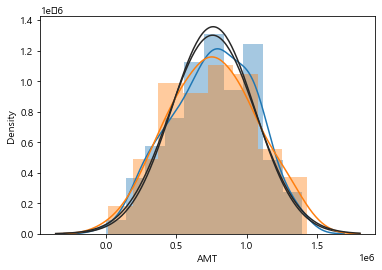

In [64]:
# 정규분포 시각화
import seaborn as sns
import matplotlib.pyplot as plt

# 한글 처리
plt.rc("font", family = "Malgun Gothic")
# x : 데이터 집합
# stats.norm : 정규 분포 표시
sns.distplot(rainNamt, fit=stats.norm)
sns.distplot(rainYamt, fit=stats.norm)
plt.show()

In [65]:
### 등분산성 검증
# - 귀무가설 : 두 집단간 분산이 동일하다. (p-value > 0.05)
# - 대립가설 : 두 집단간 분산이 동일하지 않다

# 등분산성 검증은 3가지 방법으로 진행됩니다.
# 1. levene(레빈) 방법
# 2. fligner(플리그너) 방법
# 3. bartlett(바틀렛) 방법

sLevene = stats.levene(rainNamt, rainYamt)
print("등분산성 levene 검증결과 = ", sLevene)
print("t-검정 통계량 = %.3f,   p-value = %.3f" %(sLevene))
# (해석)
#  1. p-value=0.712 > 0.05 이므로, 귀무가설 체택
#  2. 귀무가설 체택 : 두 집단간 등분산성 만족
print()

sFligner = stats.fligner(rainNamt, rainYamt)
print("등분산성 fligner 검증결과 = ", sFligner)
print("t-검정 통계량 = %.3f,   p-value = %.3f" %(sFligner))
# (해석)
#  1. p-value=0.705 > 0.05 이므로, 귀무가설 체택
#  2. 귀무가설 체택 : 두 집단간 등분산성 만족
print()

sBartlett = stats.bartlett(rainNamt, rainYamt)
print("등분산성 bartlett 검증결과 = ", sBartlett)
print("t-검정 통계량 = %.3f,   p-value = %.3f" %(sBartlett))
# (해석)
#  1. p-value=0.604 > 0.05 이므로, 귀무가설 체택
#  2. 귀무가설 체택 : 두 집단간 등분산성 만족

등분산성 levene 검증결과 =  LeveneResult(statistic=0.13618283405945808, pvalue=0.7123452333011173)
t-검정 통계량 = 0.136,   p-value = 0.712

등분산성 fligner 검증결과 =  FlignerResult(statistic=0.14330809936064023, pvalue=0.705014212806607)
t-검정 통계량 = 0.143,   p-value = 0.705

등분산성 bartlett 검증결과 =  BartlettResult(statistic=0.2688957613342281, pvalue=0.6040734684690022)
t-검정 통계량 = 0.269,   p-value = 0.604


In [66]:
# 검증하기 (Independent Samples t-test)
# 첫번째 : 기준집단, 
# 두번째 : 관측집단

# equal_var : 정규성과 등분산성 모두를 만족하는 경우 작성
result = stats.ttest_ind(rainNamt, rainYamt, equal_var=True)

print("한 집단 평균 검정 (단일 표본검정) = ", result)
print("t-검정 통계량 = %.3f,   p-value = %.3f" %(result))

# (해석 - 검증결과)
#  1. p-value=0.920 > 0.05 이므로, 귀무가설 채택
#  2. 귀무가설 채택 : 두 집단간 평균의 차이는 없다.
#                   : 비가 올때와 안올때에 무관하게 매출에는 영향을 미치지 않음

한 집단 평균 검정 (단일 표본검정) =  Ttest_indResult(statistic=0.10109828602924716, pvalue=0.919534587722196)
t-검정 통계량 = 0.101,   p-value = 0.920
